# Sprint2_Part1_데이터 불러오기  
> 목표: 데이터를 불러오는 방법을 알아본다. (코딩 x, 데이터 수집/정제 과정 파악 o)  
> 내용: 정형 / 반정형 / 비정형 데이터 수집, 기초적 데이터 분석, API 호출 사용법

In [ ]:
print("Hello World!")

# 정형 데이터

In [ ]:
# 정형 데이터
import pandas as pd

url = "https://raw.githubusercontent.com/rngus4656/datasets/refs/heads/main/S2/titanic.csv"

df = pd.read_csv(url)
df

# 반정형 데이터

In [ ]:
# 반정형 데이터
import requests

url = "https://raw.githubusercontent.com/rngus4656/datasets/refs/heads/main/S2/movies.json"
response = requests.get(url)

data = response.json()

data[0:5]

In [ ]:
# 반정형 데이터
import requests

url = "https://raw.githubusercontent.com/rngus4656/datasets/refs/heads/main/S2/movies.json"
response = requests.get(url)
data = response.json()

data_5 = []
for row in data[0:4]:
  for i,j in row.items():
    data_5.append((i,j))

print('첫 행의 열 이름: ',data[0].keys(),'\n, 첫 행의 값: ', data[0].values() )
print(data_5)

In [ ]:
# json파일을 DataFrame으로 호출
import pandas as pd

url = "https://raw.githubusercontent.com/rngus4656/datasets/refs/heads/main/S2/movies.json"
df = pd.read_json(url)

df

# 비정형 데이터

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


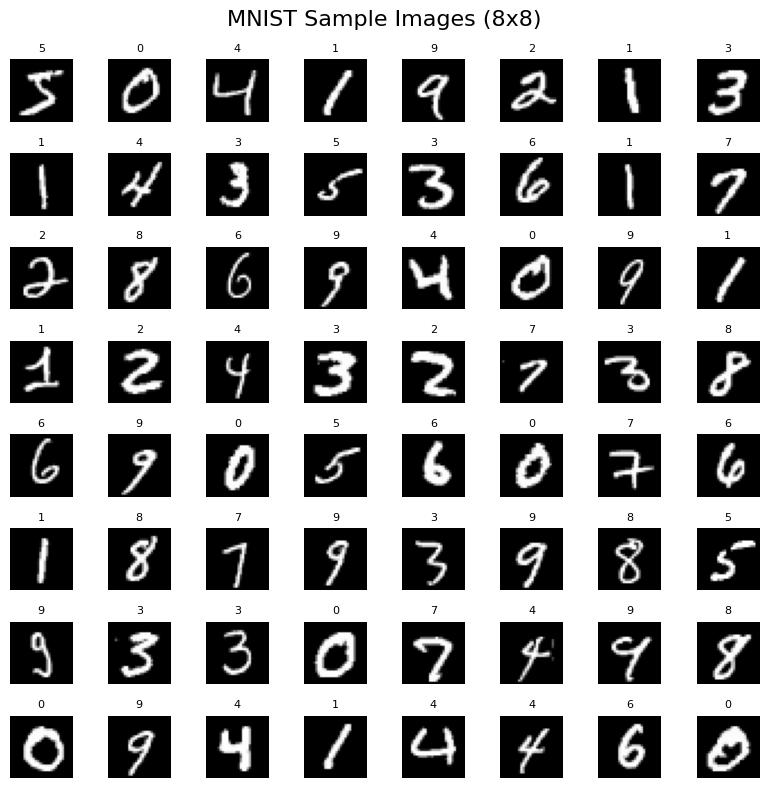

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# MNIST 로드
(x_train, y_train), (_, _) = mnist.load_data()

# 8x8 그리드 시각화
fig, axes = plt.subplots(8, 8, figsize=(8, 8))

idx = 0
for i in range(8):
    for j in range(8):
        axes[i, j].imshow(x_train[idx], cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(y_train[idx], fontsize=8)
        idx += 1

plt.suptitle("MNIST Sample Images (8x8)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1) 기본 설정
sr = 16000          # sampling rate
note_dur = 0.35     # 한 음 길이(초)
gap = 0.03          # 음 사이 짧은 공백(초)

# 2) 음계(주파수) 정의: C4~A4
notes_hz = {
    "C4": 261.63,
    "D4": 293.66,
    "E4": 329.63,
    "F4": 349.23,
    "G4": 392.00,
    "A4": 440.00,
    "REST": 0.0
}

# 3) 반짝반짝 작은별(초반 구절) - "C C G G A A G"
melody = ["C4","C4","G4","G4","A4","A4","G4"]

def synth_tone(freq, duration, sr):
    """사인파 + 간단한 엔벨로프(클릭 소리 줄이기)"""
    n = int(sr * duration)
    t = np.linspace(0, duration, n, endpoint=False)

    if freq == 0.0:
        return np.zeros(n, dtype=np.float32)

    wave = np.sin(2 * np.pi * freq * t).astype(np.float32)

    # Attack/Release envelope
    attack = int(0.02 * sr)
    release = int(0.04 * sr)
    env = np.ones(n, dtype=np.float32)
    env[:attack] = np.linspace(0, 1, attack, endpoint=False)
    env[-release:] = np.linspace(1, 0, release, endpoint=False)

    return 0.5 * wave * env

# 4) 멜로디 합성
audio_parts = []
for note in melody:
    audio_parts.append(synth_tone(notes_hz[note], note_dur, sr))
    audio_parts.append(np.zeros(int(sr * gap), dtype=np.float32))

audio = np.concatenate(audio_parts)

# 5) 파형 시각화
t = np.arange(len(audio)) / sr
plt.figure(figsize=(10, 3))
plt.plot(t, audio)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Twinkle Twinkle (Short Phrase) - Waveform")
plt.show()

# 6) 스펙트로그램 시각화
plt.figure(figsize=(10, 4))
plt.specgram(audio, Fs=sr)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Twinkle Twinkle (Short Phrase) - Spectrogram")
plt.colorbar(label="Intensity (dB)")
plt.show()


In [ ]:
from IPython.display import Audio

Audio(audio, rate=sr)


# 데이터셋 불러오기

In [6]:
# 데이터 셋 불러오기

import pandas as pd

url = "https://raw.githubusercontent.com/rngus4656/datasets/refs/heads/main/S2/titanic.csv"
df = pd.read_csv(url)

#df # 모든 행
#df.info()
#df.head() # 맨 위 5개 행
# df.tail() # 맨 뒤 5개 행
#df.sample(10, random_state=42)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S


In [7]:
# 데이터셋 구조

df.shape

(891, 12)

In [ ]:
# 데이터 셋 데이터 기본정보

df.info()

In [8]:
# 데이터셋 수치 정보

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 데이터셋 칼럼 리스트

df.columns

| 컬럼명             | 의미    | 설명                  |
| --------------- | -------- | ------------------- |
| **PassengerId** | 승객 ID    | 각 승객을 구분하기 위한 고유 번호 |
| **Survived**    | 생존 여부    | 생존 = 1, 사망 = 0      |
| **Pclass**      | 객실 등급    | 1등석 / 2등석 / 3등석     |
| **Name**        | 이름       | 승객의 이름              |
| **Sex**         | 성별       | male / female       |
| **Age**         | 나이       | 승객의 나이 (결측치 존재)     |
| **SibSp**       | 형제·배우자 수 | 함께 탑승한 형제자매 + 배우자 수 |
| **Parch**       | 부모·자녀 수  | 함께 탑승한 부모 + 자녀 수    |
| **Ticket**      | 티켓 번호    | 승객의 티켓 고유 번호        |
| **Fare**        | 요금       | 지불한 승선 요금           |
| **Cabin**       | 객실 번호    | 객실 위치 정보 (결측치 많음)   |
| **Embarked**    | 탑승 항구    | 탑승한 항구 (C, Q, S)    |


In [ ]:
# 결측치 정보

df.isnull().sum() # isnull 대신 isna도 사용 가능

In [23]:
# 중복값 정보
# 중복값을 확인하는 이유는? 중복값 있을 경우 df.drop_duplicates()로 제거

df.duplicated("Ticket").sum()

np.int64(210)

In [32]:
# 데이터의 고유값 수

df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
# 특정 칼럼 값의 개수, 백분율 -> normalize=True, subset 기준을 다양하게 할 수 있음

df.value_counts(subset=['Survived'], normalize=True)

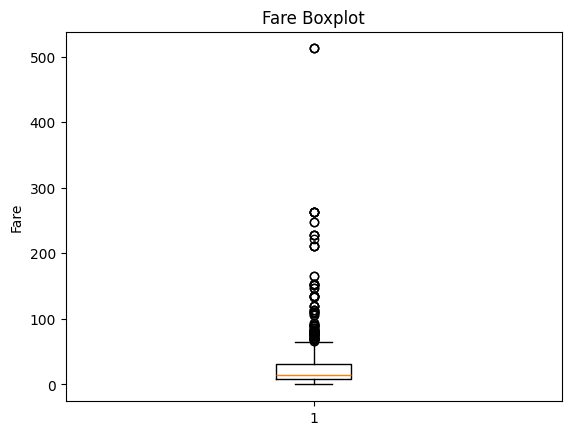

In [19]:
# 이상치 탐지하기

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df["Fare"]) # 박스 플롯을 통해 이상치를 시각화 할 수 있다.
plt.title("Fare Boxplot")
plt.ylabel("Fare")
plt.show()

In [20]:
# 이상치에 해당하는 데이터를 살펴보고 특징을 유추할 수 있다. 과연 이상치는 제거 대상인가?

Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["Fare"] < lower) | (df["Fare"] > upper)]

print('Outliers_cnt:', len(outliers))
outliers.sort_values(by='Fare',ascending=False).reset_index(drop=True)

Outliers_cnt: 116


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
1,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
2,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
3,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
4,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
111,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
112,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
113,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
114,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S


In [ ]:
# 이상치 중 가장 높은 3개 행이 PC 17755 티켓이고, df에 해당 티켓은 3개 행만 존재한다. 결론적으로, 제거 대상이 아니라는 결론이 나온다.

df[(df["Ticket"] == "PC 17755")]

In [ ]:
# 데이터셋 상관관계(수치형 칼럼만)
# 생존 여부에 가장 영향을 많이 준 칼럼은?

df.corr(numeric_only=True)

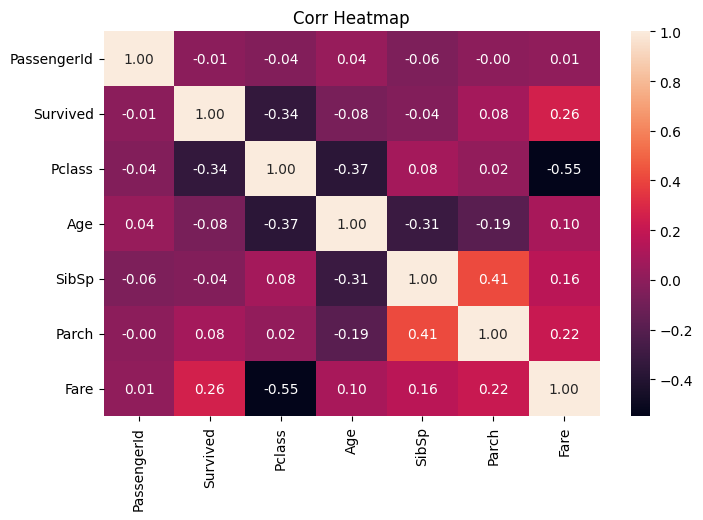

In [24]:
# 히트맵으로 상관관계 확인

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.title("Corr Heatmap")
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            fmt='.2f')
plt.show()

In [26]:
# groupby, 코딩이 아니더라도 실제 데이터 분석 툴과 현업 분석에서 많이 쓰이는 기법

df.groupby('Sex')['Survived'].mean().round(2) # 성별 평균 생존율

,Survived
Sex,
female,0.74
male,0.19


In [27]:
df.groupby('Pclass')['Fare'].mean() # 객실 등급별 요금

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [28]:
# 집계함수 agg(=aggregate)

df.groupby('Sex')['Survived'].agg(['count', 'mean', 'sum']) # 성별간 생존 집계(개수, 평균, 총합)

,count,mean,sum
Sex,,,
female,314,0.742038,233
male,577,0.188908,109


In [ ]:
# 성별 + 객실 등급별 생존율

df.groupby(['Sex', 'Pclass'])['Survived'].mean()
df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack() # 피봇 테이블

In [ ]:
# 그 외 다양한 활용 가능

df.groupby('Pclass')[['Age', 'Fare']].mean() # 객실 등급별 나이&요금 평균
df.groupby('Embarked')['PassengerId'].count() # 항구별 승선인원 수
df.groupby('Pclass')['Age'].mean() # 객실별 평균 나이
df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].mean() # 생존한 여성그룹의 객실 등급
df.groupby('Sex').agg(
    Pid_cnt=('PassengerId', 'count'),
    age_mean=('Age', 'mean'),
    fare_mean=('Fare', 'mean'),
    survival_sum=('Survived', 'sum')) # 성별당 승객:개수 나이:평균, 가격:평균, 생존:합계

## 연습 예제

| 컬럼명              | 한글 의미  | 설명                                         |
| ---------------- | ------ | ------------------------------------------ |
| **sepal_length** | 꽃받침 길이 | 꽃받침(sepal)의 길이                             |
| **sepal_width**  | 꽃받침 너비 | 꽃받침(sepal)의 너비                             |
| **petal_length** | 꽃잎 길이  | 꽃잎(petal)의 길이                              |
| **petal_width**  | 꽃잎 너비  | 꽃잎(petal)의 너비                              |
| **species**      | 품종     | 아이리스 꽃의 종류 (Setosa, Versicolor, Virginica) |


In [ ]:
# 붓꽃(iris) 데이터로 자유롭게 연습 해보기
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rngus4656/datasets/refs/heads/main/S2/iris.csv")
df.head()

# API 호출

In [33]:
# 메뉴얼 9p 명세 참조, path 뒤에 2 붙여야함
# xml 데이터 불러올때는 비교적 쉬운 방법으로 가공이 가능
import pandas as pd

# 꼭 본인의 인증키를 API_key에 넣어주세요!
API_key = 'd5bb8df93585dfd9fb19b6db4b41957605bdf145c44d4673e74bb84c3b748c7c'

# 26년 이후로 지역코드는 더이상 쓰지 않을 예정이라 한다 🥲 -> 공공데이터 포털 문의하기 생각보다 굉장히 친절한 편
# url = f"http://apis.data.go.kr/B551011/KorPetTourService2/areaCode2?serviceKey={API_key}&pageNo=1&numOfRows=100&MobileOS=ETC&MobileApp=Bootcamp_AIPM"

# areacode = pd.read_xml(url, xpath='.//item', ).drop(columns=['rnum'])
# areacode.to_csv('areacode.csv')
# areacode


# 법정동 분류코드
url = f'https://apis.data.go.kr/B551011/KorPetTourService2/ldongCode2?serviceKey={API_key}&numOfRows=300&pageNo=1&MobileOS=ETC&MobileApp=Bootcamp_AIPM&lDongListYn=Y'

dongcode = pd.read_xml(url, xpath='.//item').drop(columns=['rnum'])
dongcode.to_csv('dongcode.csv') # 파이썬으로 불러올 때는 csv 형식으로
dongcode.to_excel('dongcode.xlsx') # 엑셀 파일에서 보려는 목적이라면 엑셀 형태로 저장 가능
dongcode

,lDongRegnCd,lDongRegnNm,lDongSignguCd,lDongSignguNm
0,11,서울특별시,110,종로구
1,11,서울특별시,140,중구
2,11,서울특별시,170,용산구
3,11,서울특별시,200,성동구
4,11,서울특별시,215,광진구
...,...,...,...,...
259,52,전북특별자치도,740,장수군
260,52,전북특별자치도,750,임실군
261,52,전북특별자치도,770,순창군
262,52,전북특별자치도,790,고창군


In [34]:
# json으로 불러올때는 하위속성을 전부 거쳐서 가공하여 불러온다.
# 분류 체계 시스템 정보 불러오기
import requests

url_2 = f'https://apis.data.go.kr/B551011/KorPetTourService2/lclsSystmCode2?serviceKey={API_key}&numOfRows=245&pageNo=1&MobileOS=ETC&MobileApp=Bootcamp_AIPM&lclsSystmListYn=Y&_type=json'
resp = requests.get(url_2)
data = resp.json()

Sys_code = pd.DataFrame(data['response']['body']['items']['item']).drop(columns='rnum')
Sys_code.to_csv('Sys_code.csv')
Sys_code.to_excel('Sys_code.xlsx')
Sys_code

,lclsSystm1Cd,lclsSystm1Nm,lclsSystm2Cd,lclsSystm2Nm,lclsSystm3Cd,lclsSystm3Nm
0,AC,숙박,AC01,호텔,AC010100,호텔
1,AC,숙박,AC02,콘도미니엄,AC020100,콘도
2,AC,숙박,AC02,콘도미니엄,AC020200,레지던스
3,AC,숙박,AC03,펜션/민박,AC030100,펜션
4,AC,숙박,AC03,펜션/민박,AC030200,한옥스테이
...,...,...,...,...,...,...
240,VE,문화관광,VE11,교통시설,VE110500,고속도로휴게소
241,VE,문화관광,VE11,교통시설,VE110600,지하철
242,VE,문화관광,VE12,기타문화관광지,VE120100,서점
243,VE,문화관광,VE12,기타문화관광지,VE120200,카지노


In [35]:
# 지역기반 관광정보를 조회한다.

url_ab = f'https://apis.data.go.kr/B551011/KorPetTourService2/areaBasedList2?serviceKey={API_key}&numOfRows=200&pageNo=1&MobileOS=ETC&MobileApp=Bootcamp_AIPM&arrange=C&contentTypeId=32&_type=json'
resp = requests.get(url_ab)
data = resp.json()

abList = pd.DataFrame(data['response']['body']['items']['item'])
abList.to_csv('abList.csv')
abList.to_excel('abList.xlsx')
abList

,addr1,addr2,areacode,cat1,cat2,cat3,contentid,contenttypeid,createdtime,firstimage,...,modifiedtime,sigungucode,tel,title,zipcode,lDongRegnCd,lDongSignguCd,lclsSystm1,lclsSystm2,lclsSystm3
0,충청남도 예산군 덕산면 온천단지2로 77,,34,B02,B0201,B02011300,3446629,32,20241216174259,http://tong.visitkorea.or.kr/cms/resource/22/3...,...,20251126134729,11,,스파뷰호텔,32406,44,810,AC,AC02,AC020200
1,경상북도 경주시 엑스포로 45 (신평동),,35,B02,B0201,B02010100,3401777,32,20241030151615,,...,20251121155251,2,,더케이호텔경주,38116,47,130,AC,AC01,AC010100
2,경상북도 경주시 보문로 280-12 (북군동),,35,B02,B0201,B02010100,3354917,32,20240827181952,http://tong.visitkorea.or.kr/cms/resource/10/3...,...,20251118170649,2,,키녹,38117,47,130,AC,AC01,AC010100
3,인천광역시 연수구 컨벤시아대로 165,,2,B02,B0201,B02010500,2007951,32,20150605021104,http://tong.visitkorea.or.kr/cms/resource/37/2...,...,20251117155346,8,,오크우드 프리미어 인천,21998,28,185,AC,AC02,AC020100
4,강원특별자치도 양양군 손양면 선사유적로 678,,32,B02,B0201,B02010100,590440,32,20080719013445,http://tong.visitkorea.or.kr/cms/resource/71/2...,...,20251114103806,7,1588-4888,쏠비치 양양,25042,51,830,AC,AC01,AC010100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,서울특별시 종로구 북촌로11가길 5 (가회동),,1,B02,B0201,B02011600,3072191,32,20231214171816,,...,20240324201941,23,02-3673-3666,노스텔지어,03052,11,110,AC,AC03,AC030200
191,서울특별시 성북구 성북로23나길 4,(성북동),1,B02,B0201,B02011100,2583200,32,20181227011427,,...,20240324201919,17,010-8003-1323,아임그린게스트하우스,02879,11,290,AC,AC06,AC060200
192,경상북도 영양군 석보면 두들마을1길 42,,35,B02,B0201,B02011600,2598962,32,20190424201717,,...,20240324201850,13,054-680-6444,장계향문화체험교육원,36560,47,760,AC,AC03,AC030200
193,서울특별시 용산구 만리재로36길 16-7,(서계동),1,B02,B0201,B02011100,2622608,32,20191002233357,,...,20240324201739,21,02-2039-2911,서울역 알게스트하우스,04300,11,170,AC,AC06,AC060200


In [ ]:
# 지역기반 관광정보를 조회한다.

url_ab = f'https://apis.data.go.kr/B551011/KorPetTourService2/detailImage2?serviceKey={API_key}&numOfRows=200&pageNo=1&MobileOS=ETC&MobileApp=Bootcamp_AIPM&arrange=C&contentTypeId=32&_type=json'
resp = requests.get(url_ab)
data = resp.json()

abList = pd.DataFrame(data['response']['body']['items']['item'])
abList.to_csv('abList.csv')
abList.to_excel('abList.xlsx')
abList